# Bolsa de bolas
https://www.youtube.com/watch?v=Gwjbadd3W9Q

Tenemos una bolsa con
- 8 bolas rojas
- 3 bolas blancas
- 9 bolas azules

Sacando 3 bolas, calcular la probabilidades de:

In [9]:
bolsa = []
bolsa.extend([1 for i in range(8)]) # 1 roja
bolsa.extend([2 for i in range(3)]) # 2 blanca
bolsa.extend([3 for i in range(9)]) # 3 azul
bolsa

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]

[]

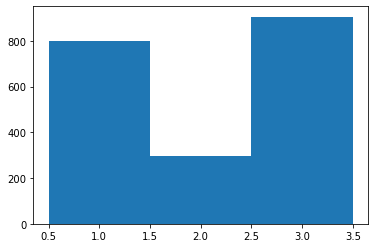

In [10]:
import random
import math
import matplotlib.pyplot as plt
bolas = [bolsa[math.floor(random.random()*len(bolsa))] for i in range(2000)]
plt.hist(bolas,bins=[i+1 for i in range(4)],align='left')
plt.plot()

In [11]:
import pandas as pd
df = pd.DataFrame(bolas,columns=['bolas'])
df.tail()

,bolas
1995,2
1996,1
1997,3
1998,1
1999,1


In [12]:
df.loc[:,'repeticiones']=1
df.tail()

,bolas,repeticiones
1995,2,1
1996,1,1
1997,3,1
1998,1,1
1999,1,1


In [13]:
df = df.groupby('bolas').count()
df

,repeticiones
bolas,
1,799
2,295
3,906


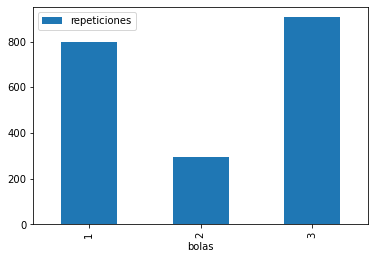

In [14]:
df.plot.bar()

In [15]:
bolas1=list(bolas)
bolas2=[]
bolas3=[]
for i in range(len(bolas1)):
    bolsa2=list(bolsa)
    bolsa2.pop(bolsa.index(bolas1[i]))
    bolas2 = [bolsa2[math.floor(random.random()*len(bolsa2))] for i in range(len(bolas1))]
    bolsa3=list(bolsa2)
    bolsa3.pop(bolsa2.index(bolas2[i]))    
    bolas3 = [bolsa3[math.floor(random.random()*len(bolsa3))] for i in range(len(bolas1))]

###  a) Extraer 3 bolas blancas

In [16]:
# P( B1 y B2 y B3)
3/20 * 2/19 * 1/18

0.0008771929824561404

In [17]:
# P( B1 y B2 y B3 )
len(
    [i for i in range(len(bolas1)) if bolas1[i]==2 and bolas2[i]==2 and bolas3[i]==2]
)/len(bolas1)

0.0045

### Extraer una bola blanca en la primera extración

In [18]:
# P(B1)
3/20

0.15

In [19]:
# P(B1)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==2 ]
)/len(bolas1)

0.1475

### Extraer una bola roja

In [20]:
# P(R1)
8/20

0.4

In [21]:
# P(R1)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==1 ]
)/len(bolas1)

0.3995

### Extraer dos bolas blancas consecutivas

In [22]:
# P(B1 y B2)
3/20*2/19

0.015789473684210527

In [23]:
# P(B1 y B2)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==2 and bolas2[i]==2]
)/len(bolas1)

0.03

### Extraer dos bolas rojas consecutivas

In [24]:
# P(R1 y R2)
8/20*7/19

0.1473684210526316

In [25]:
# P(B1 y B2)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==1 and bolas2[i]==1]
)/len(bolas1)

0.1365

###  Extraer 3 bolas rojas consecutivas

In [26]:
# P(R1 y R2 y R3)
8/20*7/19*6/18

0.04912280701754387

In [27]:
# P(B1 y B2 y B3)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==1 and bolas2[i]==1 and bolas3[i]==1]
)/len(bolas1)

0.0455

### b) 2 rojas y 1 blanca, sin importar el orden

In [28]:
# P(RRB)
3*(8/20*7/19*3/18)

0.0736842105263158

In [29]:
# P(RRB)
len(
    [i for i in range(len(bolas1)) if  (bolas1[i]==2 and bolas2[i]==1 and bolas3[i]==1)
                                    or (bolas1[i]==1 and bolas2[i]==2 and bolas3[i]==1)
                                    or (bolas1[i]==1 and bolas2[i]==1 and bolas3[i]==2)
    ]
)/len(bolas1)

0.059

### c) Que salgan en el orden rojo, blanco y azul

In [30]:
# P(R1 y B2 y A3)
8/20*3/19*9/18

0.03157894736842106

In [31]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==1 and bolas2[i]==2 and bolas3[i]==3 ]
)/len(bolas1)

0.0305

### Que salga blanca en la primera bola

In [32]:
# P(B1)
3/20

0.15

In [33]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==2 ]
)/len(bolas1)

0.1475

### Que salga blanca en la segunda bola

In [34]:
# P(B2)
3/19

0.15789473684210525

In [35]:
len(
    [i for i in range(len(bolas1)) if  bolas2[i]==2 ]
)/len(bolas1)

0.1665

### Que salga blanca en la tercera bola

In [36]:
# P(B3)
3/18

0.16666666666666666

In [37]:
len(
    [i for i in range(len(bolas1)) if  bolas3[i]==2 ]
)/len(bolas1)

0.1705

### Que las dos primeras bolas sean blancas

In [38]:
# P(B1 y B2)
3/20*2/19

0.015789473684210527

In [39]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==2 and bolas2[i]==2]
)/len(bolas1)

0.03

### Que la primera y tercera bola sean blancas

In [40]:
# P(B1 y B3)
3/20*2/18

0.016666666666666666

In [41]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==2 and bolas3[i]==2 ]
)/len(bolas1)

0.0265

### Que la segunda y tercera sean blancas

In [42]:
# P(B2 y B3)
3/19*2/18

0.017543859649122806

In [43]:
len(
    [i for i in range(len(bolas1)) if  bolas2[i]==2 and bolas3[i]==2 ]
)/len(bolas1)

0.0315

### Que salga roja en la primera bola

In [44]:
# P(B1)
8/20

0.4

In [45]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==1 ]
)/len(bolas1)

0.3995

### Que salga roja en la segunda bola

In [46]:
# P(B2)
8/19

0.42105263157894735

In [47]:
len(
    [i for i in range(len(bolas1)) if  bolas2[i]==1 ]
)/len(bolas1)

0.3555

### Que salga roja en la tercera bola

In [48]:
# P(B3)
8/18

0.4444444444444444

In [49]:
len(
    [i for i in range(len(bolas1)) if  bolas3[i]==1 ]
)/len(bolas1)

0.3365

### Que las dos primeras bolas sean rojas

In [50]:
# P(B1 y B2)
8/20*7/19

0.1473684210526316

In [51]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==1 and bolas2[i]==1]
)/len(bolas1)

0.1365

### Que la primera y tercera bola sean rojas

In [52]:
# P(B1 y B3)
8/20*7/18

0.15555555555555556

In [53]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==1 and bolas3[i]==1 ]
)/len(bolas1)

0.1375

### Que la segunda y tercera sean rojas

In [54]:
# P(B2 y B3)
8/19*7/18

0.16374269005847952

In [55]:
len(
    [i for i in range(len(bolas1)) if  bolas2[i]==1 and bolas3[i]==1 ]
)/len(bolas1)

0.108

### d) Que salga alguna blanca

In [56]:
# P(B1 o B2 o B3) = P(B1)+P(B2)+P(B3) - P(B1 y B2) - P(B1 y B3) - P(B2 y B3) + P(B1 y B2 y B3)
3/20+3/19+3/18 - 3/20*2/19 - 3/20*2/18 - 3/19*2/18 + 3/20*2/19*1/18 # ¡¡Nooooo!!

0.425438596491228

In [57]:
# P(B1 o B2 o B3) = P(B1)+P(B2)+P(B3) - P(B1 y B2) - P(B1 y B3) - P(B2 y B3) + P(B1 y B2 y B3)
3/20+3/20+3/20 - 3* 3/20*2/19 + 3/20*2/19*1/18 # Así, sí

0.40350877192982454

In [58]:
# 3*P(B1 y B2' y B3') + 3*P(B1 y B2 y B3') + (B1 y B2 y B3)
3*3/20*17/19*16/18 + 3*3/20*2/19*17/18 + 3/20*2/19*1/18

0.4035087719298246

In [59]:
# También 1-P(B1' y B2' y B3')
1-17/20*16/19*15/18

0.4035087719298246

In [60]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==2 or bolas2[i]==2 or bolas3[i]==2 ]
)/len(bolas1)

0.401

### Que salga alguna roja

In [61]:
# P(R1 o R2 o R3) = P(R1)+P(R2)+P(R3) - P(R1 y R2) - P(R1 y R3) - P(R2 y R3) + P(R1 y R2 y R3)
8/20+8/19+8/18 - 8/20*7/19 - 8/20*7/18 - 8/19*7/18 + 8/20*7/19*6/18 # ¡¡Nooooo!!

0.8479532163742691

In [62]:
# P(R1 o R2 o R3) = P(R1)+P(R2)+P(R3) - P(R1 y R2) - P(R1 y R3) - P(R2 y R3) + P(R1 y R2 y R3)
8/20+8/20+8/20 - 3*8/20*7/19 + 8/20*7/19*6/18

0.8070175438596493

In [63]:
# 3*P(R1 y R2' y R3') + 3*P(R1 y R2 y R3') + (R1 y R2 y R3)
3*8/20*12/19*11/18 + 3*8/20*7/19*12/18 + 8/20*7/19*6/18

0.8070175438596491

In [64]:
# También 1-P(B1' y B2' y B3')
1-12/20*11/19*10/18

0.8070175438596492

In [65]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==1 or bolas2[i]==1 or bolas3[i]==1 ]
)/len(bolas1)

0.755

### e) 1 de cada color, sin importar el orden

In [66]:
# P(RBA)
3*2*(8/20*3/19*9/18) # 6 variaciones (sí importa el orden) sin repetición de 3 elementos de 3 en 3: VSR(3,3)=3!/(3-3)!=3*2*1

0.18947368421052635

In [67]:
len(
    [i for i in range(len(bolas1)) if   bolas1[i]!=bolas2[i] 
                                    and bolas2[i]!=bolas3[i] 
                                    and bolas1[i]!=bolas3[i]
    ]
)/len(bolas1)

0.165